In [213]:
import numpy as np
import pandas as pd
from pysr import PySRRegressor
from IPython.display import HTML
from matplotlib import pyplot as plt

In [79]:
df = pd.read_csv('SMBH_Data_format_0227.csv',header=1,skiprows=lambda i: i % 2)
df

,ID,Galaxy,Morphology,Type,T-type,T-type_std,Arm Class,Bar,Disk,Core,...,Log_Avg_Rho_10kpc_approx,Log_Avg_Rho_10kpc_approx_std,Log_Avg_Rho_10kpc_exact_final,Log_Avg_Rho_10kpc_exact_final_std,Log_Avg_Rho_100pc_approx,Log_Avg_Rho_100pc_approx_std,Log_Avg_Rho_5kpc_approx,Log_Avg_Rho_5kpc_approx_std,Log_Avg_rho_5kpc_exact_all,Log_Avg_rho_5kpc_exact_all_std
0,1,A1836 BCG,E,ETG,NaN,NaN,NaN,no,no,yes,...,-1.360877,NaN,-1.361284,NaN,1.987071,NaN,-0.713748,NaN,-0.716179,NaN
1,2,IC 1459,E,ETG,-4.8,0.4,NaN,no,no,yes,...,-1.390948,NaN,-1.391062,NaN,2.985206,NaN,-0.637989,NaN,-0.638676,NaN
2,3,IC 1481,E? (merger),ETG,8.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,IC 4296,E,ETG,-4.9,0.3,NaN,no,no,no,...,-1.476680,NaN,-1.476624,NaN,2.142677,NaN,-0.788658,NaN,-0.789930,NaN
4,5,Mrk 1216,S0,ETG,NaN,NaN,NaN,no,yes,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,141,NGC 6323,SBab,LTG,2.0,0.3,NaN,yes,yes,no,...,-2.829093,NaN,-2.829092,NaN,0.808899,NaN,-1.929342,NaN,-1.929224,NaN
141,142,NGC 6926,SBc,LTG,5.6,2.3,5.0,yes,yes,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,143,NGC 7582,SBab,LTG,2.1,0.5,NaN,yes,yes,no,...,-2.478355,NaN,-2.481833,NaN,2.312835,NaN,-1.577816,NaN,-1.577750,NaN
143,144,UGC 3789,SABa,LTG,1.6,0.6,NaN,yes,yes,no,...,-2.508741,NaN,-2.508212,NaN,2.058912,NaN,-1.626496,NaN,-1.626075,NaN


In [86]:
df.columns

Index(['ID', 'Galaxy', 'Morphology', 'Type', 'T-type', 'T-type_std',
       'Arm Class', 'Bar', 'Disk', 'Core',
       ...
       'Log_Avg_Rho_10kpc_approx', 'Log_Avg_Rho_10kpc_approx_std',
       'Log_Avg_Rho_10kpc_exact_final', 'Log_Avg_Rho_10kpc_exact_final_std',
       'Log_Avg_Rho_100pc_approx', 'Log_Avg_Rho_100pc_approx_std',
       'Log_Avg_Rho_5kpc_approx', 'Log_Avg_Rho_5kpc_approx_std',
       'Log_Avg_rho_5kpc_exact_all', 'Log_Avg_rho_5kpc_exact_all_std'],
      dtype='object', length=154)

In [89]:
std_col=np.array([],dtype=int)
for i,col in enumerate(df.columns):
    if (col[-3:]=='std') & (col!='M_BH_std'):
        std_col=np.append(std_col,i)

In [90]:
cols=np.delete(np.arange(df.shape[1]),std_col)

In [126]:
df_nostd=df.iloc[:,cols]

In [92]:
df_nostd.isnull().all()

ID                               False
Galaxy                           False
Morphology                       False
Type                             False
T-type                           False
                                 ...  
Log_Avg_Rho_10kpc_approx         False
Log_Avg_Rho_10kpc_exact_final    False
Log_Avg_Rho_100pc_approx         False
Log_Avg_Rho_5kpc_approx          False
Log_Avg_rho_5kpc_exact_all       False
Length: 84, dtype: bool

In [93]:
df_nostdnonan = df_nostd[df_nostd.columns[~df_nostd.isnull().any()]]

In [94]:
df_nostdnonan

,ID,Galaxy,Morphology,Type,Pseudobulge,M_BH,M_BH_std
0,1,A1836 BCG,E,ETG,no,9.59,0.06
1,2,IC 1459,E,ETG,no,9.38,0.20
2,3,IC 1481,E? (merger),ETG,no,7.15,0.13
3,4,IC 4296,E,ETG,no,9.10,0.09
4,5,Mrk 1216,S0,ETG,no,9.69,0.16
...,...,...,...,...,...,...,...
140,141,NGC 6323,SBab,LTG,yes,7.02,0.14
141,142,NGC 6926,SBc,LTG,yes,7.68,0.50
142,143,NGC 7582,SBab,LTG,yes,7.72,0.12
143,144,UGC 3789,SABa,LTG,yes,7.07,0.05


In [109]:
nanpercent=0.10
cols_to_delete = df_nostd.columns[df_nostd.isnull().sum()/len(df_nostd) > nanpercent]
cols_to_delete

Index(['Arm Class', 'BCG/cD', 'M*_sph', 'M*_disk', 'M*_gal', 'B/T', 'log_B/T',
       'D/T', 'log_D/T', 'm_#_of_arms', 'phi', 'tan_phi', 'v_max', 'log_v_max',
       'M_DM', 'M_BH/M*_sph', 'log_M_BH/M*_sph', 'M_BH/M*_disk',
       'log_M_BH/M*_disk', 'M_BH/M*_gal', 'log_M_BH/M*_gal', 'R_e_sph_maj',
       'log_R_e_sph_maj', 'R_e_sph_eq_kpc', 'log_R_e_sph_eq_kpc', 'n_sph_maj',
       'log_n_sph_maj', 'n_sph_eq', 'log_n_sph_eq',
       'log(I_e,sph,maj/M_Sun/pc^2)', 'log(I_e,sph,eq/M_Sun/pc^2)',
       'Concentration_Index', 'avg_Rho_1kpc_Exact_All', 'r1_density_approx',
       'log10(R10_kpc)', 'logRho_R10_approx', 'log_rho10_Exact',
       'log10(R90_kpc)', 'logRho_R90_approx', 'log_rho_90_Exact_all',
       'Rho_re_spatial', 'SR_pc_All', 'Rho_SR_pc_All', 'CR_def1_approx_new',
       'Rho_cr_def1_approx_new', 'CR_def2_approx_new',
       'Rho_CR_def2_approx_new', 'Sr(pc)_2_using_Falserm_drho',
       'Log_Approx_Avg_density_10pc', 'Rho_e_Exact_new', 'log_Rho_e_Exact_new',
       'logRh

In [110]:
df_nostd.drop(cols_to_delete, axis = 1, inplace = True)

/tmp/ipykernel_2860827/2191840590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nostd.drop(cols_to_delete, axis = 1, inplace = True)


In [127]:
df_nostd

,ID,Galaxy,Morphology,Type,T-type,Arm Class,Bar,Disk,Core,AGN,...,Avg_Rho_soi_exact_all,Avg_Rho_re_Exact_all,Rho_re_Exact_all,r_soi_2BH_approx,Rho_r_soi_2BH_approx,Log_Avg_Rho_10kpc_approx,Log_Avg_Rho_10kpc_exact_final,Log_Avg_Rho_100pc_approx,Log_Avg_Rho_5kpc_approx,Log_Avg_rho_5kpc_exact_all
0,1,A1836 BCG,E,ETG,NaN,NaN,no,no,yes,no,...,43.3455,0.019965,0.004228,611.2,3.89425,-1.360877,-1.361284,1.987071,-0.713748,-0.716179
1,2,IC 1459,E,ETG,-4.8,NaN,no,no,yes,yes,...,693.8220,0.040740,0.006004,113.6,287.55400,-1.390948,-1.391062,2.985206,-0.637989,-0.638676
2,3,IC 1481,E? (merger),ETG,8.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,IC 4296,E,ETG,-4.9,NaN,no,no,no,yes,...,367.6120,0.030594,0.006163,229.6,21.28690,-1.476680,-1.476624,2.142677,-0.788658,-0.789930
4,5,Mrk 1216,S0,ETG,NaN,NaN,no,yes,no,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,141,NGC 6323,SBab,LTG,2.0,NaN,yes,yes,no,no,...,24.3697,0.402019,0.153181,88.4,5.43268,-2.829093,-2.829092,0.808899,-1.929342,-1.929224
141,142,NGC 6926,SBc,LTG,5.6,5.0,yes,yes,no,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,143,NGC 7582,SBab,LTG,2.1,NaN,yes,yes,no,yes,...,2007.2100,8.773510,2.350510,26.8,703.78300,-2.478355,-2.481833,2.312835,-1.577816,-1.577750
143,144,UGC 3789,SABa,LTG,1.6,NaN,yes,yes,no,no,...,4285.7700,1.729780,0.419856,16.4,752.63400,-2.508741,-2.508212,2.058912,-1.626496,-1.626075


In [121]:
df_nostd.dropna(axis='index',how='any')

,ID,Galaxy,Morphology,Type,T-type,Bar,Disk,Core,AGN,Pseudobulge,M_BH,M_BH_std,sigma0,log_sigma0
1,2,IC 1459,E,ETG,-4.8,no,no,yes,yes,no,9.38,0.20,306.10,2.49
3,4,IC 4296,E,ETG,-4.9,no,no,no,yes,no,9.10,0.09,332.81,2.52
5,6,NGC 0307,SAB0,ETG,-1.9,yes,yes,no,no,no,8.34,0.13,310.98,2.49
6,7,NGC 0404,S0,ETG,-2.8,no,yes,no,no,no,5.74,0.10,38.15,1.58
7,8,NGC 0524,SA0(rs),ETG,-1.2,no,yes,yes,no,no,9.00,0.10,253.46,2.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,140,NGC 6264,SBb,LTG,2.7,yes,yes,no,yes,yes,7.51,0.06,158.00,2.20
140,141,NGC 6323,SBab,LTG,2.0,yes,yes,no,no,yes,7.02,0.14,158.00,2.20
142,143,NGC 7582,SBab,LTG,2.1,yes,yes,no,yes,yes,7.72,0.12,147.00,2.17
143,144,UGC 3789,SABa,LTG,1.6,yes,yes,no,no,yes,7.07,0.05,107.00,2.03


In [128]:
df_nostd

,ID,Galaxy,Morphology,Type,T-type,Arm Class,Bar,Disk,Core,AGN,...,Avg_Rho_soi_exact_all,Avg_Rho_re_Exact_all,Rho_re_Exact_all,r_soi_2BH_approx,Rho_r_soi_2BH_approx,Log_Avg_Rho_10kpc_approx,Log_Avg_Rho_10kpc_exact_final,Log_Avg_Rho_100pc_approx,Log_Avg_Rho_5kpc_approx,Log_Avg_rho_5kpc_exact_all
0,1,A1836 BCG,E,ETG,NaN,NaN,no,no,yes,no,...,43.3455,0.019965,0.004228,611.2,3.89425,-1.360877,-1.361284,1.987071,-0.713748,-0.716179
1,2,IC 1459,E,ETG,-4.8,NaN,no,no,yes,yes,...,693.8220,0.040740,0.006004,113.6,287.55400,-1.390948,-1.391062,2.985206,-0.637989,-0.638676
2,3,IC 1481,E? (merger),ETG,8.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,IC 4296,E,ETG,-4.9,NaN,no,no,no,yes,...,367.6120,0.030594,0.006163,229.6,21.28690,-1.476680,-1.476624,2.142677,-0.788658,-0.789930
4,5,Mrk 1216,S0,ETG,NaN,NaN,no,yes,no,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,141,NGC 6323,SBab,LTG,2.0,NaN,yes,yes,no,no,...,24.3697,0.402019,0.153181,88.4,5.43268,-2.829093,-2.829092,0.808899,-1.929342,-1.929224
141,142,NGC 6926,SBc,LTG,5.6,5.0,yes,yes,no,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,143,NGC 7582,SBab,LTG,2.1,NaN,yes,yes,no,yes,...,2007.2100,8.773510,2.350510,26.8,703.78300,-2.478355,-2.481833,2.312835,-1.577816,-1.577750
143,144,UGC 3789,SABa,LTG,1.6,NaN,yes,yes,no,no,...,4285.7700,1.729780,0.419856,16.4,752.63400,-2.508741,-2.508212,2.058912,-1.626496,-1.626075


In [183]:
nanpercent=0.145
cols_to_delete = df_nostd.columns[df_nostd.isnull().sum()/len(df_nostd) > nanpercent]
df_lessnan=df_nostd.drop(cols_to_delete, axis = 1)
df_purge=df_lessnan.dropna(axis='index',how='any')
df_purge.columns
#HTML(df_purge.to_html())

Index(['ID', 'Galaxy', 'Morphology', 'Type', 'T-type', 'Bar', 'Disk', 'Core',
       'AGN', 'Pseudobulge', 'M_BH', 'M_BH_std', 'M*_sph', 'M*_gal', 'B/T',
       'log_B/T', 'sigma0', 'log_sigma0', 'M_BH/M*_sph', 'log_M_BH/M*_sph',
       'M_BH/M*_gal', 'log_M_BH/M*_gal', 'R_e_sph_maj', 'log_R_e_sph_maj',
       'R_e_sph_eq_kpc', 'log_R_e_sph_eq_kpc', 'n_sph_maj', 'log_n_sph_maj',
       'n_sph_eq', 'log_n_sph_eq'],
      dtype='object')

In [177]:
nanpercent=0.16
cols_to_delete = df_nostd.columns[df_nostd.isnull().sum()/len(df_nostd) > nanpercent]
df_lessnan=df_nostd.drop(cols_to_delete, axis = 1)
df_purge=df_lessnan.dropna(axis='index',how='any')
df_purge.columns
#HTML(df_purge.to_html())

Index(['ID', 'Galaxy', 'Morphology', 'Type', 'T-type', 'Bar', 'Disk', 'Core',
       'AGN', 'Pseudobulge', 'M_BH', 'M_BH_std', 'M*_sph', 'M*_gal', 'B/T',
       'log_B/T', 'sigma0', 'log_sigma0', 'M_BH/M*_sph', 'log_M_BH/M*_sph',
       'M_BH/M*_gal', 'log_M_BH/M*_gal', 'R_e_sph_maj', 'log_R_e_sph_maj',
       'R_e_sph_eq_kpc', 'log_R_e_sph_eq_kpc', 'n_sph_maj', 'log_n_sph_maj',
       'n_sph_eq', 'log_n_sph_eq', 'log(I_e,sph,maj/M_Sun/pc^2)',
       'log(I_e,sph,eq/M_Sun/pc^2)', 'Concentration_Index',
       'avg_Rho_1kpc_Exact_All', 'r1_density_approx', 'log10(R10_kpc)',
       'logRho_R10_approx', 'log_rho10_Exact', 'log10(R90_kpc)',
       'logRho_R90_approx', 'log_rho_90_Exact_all', 'Rho_re_spatial',
       'SR_pc_All', 'Rho_SR_pc_All', 'CR_def1_approx_new',
       'Rho_cr_def1_approx_new', 'CR_def2_approx_new',
       'Rho_CR_def2_approx_new', 'Sr(pc)_2_using_Falserm_drho',
       'Log_Approx_Avg_density_10pc', 'Rho_e_Exact_new', 'log_Rho_e_Exact_new',
       'logRho_e_approx_New

In [202]:
y = df_purge['M_BH']
w = 1/df_purge['M_BH_std']**2
X = df_purge.iloc[:,12:].to_numpy()

'''
model = PySRRegressor(
    binary_operators=["+", "-", "*", "/"],
    unary_operators=["exp"],
    select_k_features=5,
)
'''
model = PySRRegressor(
    binary_operators=["+", "-", "*", "/",'pow'],
    unary_operators=["exp"],
)


model.fit(X, y)

/home/zj448/miniconda3/lib/python3.9/site-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/home/zj448/miniconda3/lib/python3.9/site-packages/pysr/sr.py:1761: UserWarning: Note: you are running with 10 features or more. Genetic algorithms like used in PySR scale poorly with large numbers of features. Consider using feature selection techniques to select the most important features (you can do this automatically with the `select_k_features` parameter), or, alternatively, doing a dimensionality reduction beforehand. For example, `X = PCA(n_components=6).fit_transform(X)`, using scikit-learn's `PCA` class, will reduce the number of features to 6 in an interpretable way, as each resultant feature will be a linear combination of the original features. 
  warnings.warn(


Started!

Cycles per second: 8.710e+03
Head worker occupation: 38.0%. This is high, and will prevent efficient resource usage. Increase `ncyclesperiteration` to reduce load on head worker.
Progress: 24 / 600 total iterations (4.000%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           3.542e+00  -1.262e+00  6.5438194
2           1.063e+00  1.204e+00  exp(2.0658534)
3           4.491e-01  8.616e-01  (x0 - x5)
5           1.153e-03  2.982e+00  (x1 - (0.03398921 - x9))
7           1.351e-06  3.375e+00  (x1 - ((0.03398921 * 0.03398921) - x9))
9           3.242e-07  7.134e-01  (x1 - ((0.03398921 * (0.03398921 / x5)) - x9))
10          1.009e-07  1.167e+00  (x1 - ((0.03398921 * (0.03398921 / exp(x5))) - x9))
14          9.215e-08  2.266e-02  (x1 - (((exp(x16) ^ ((-1.3196154 - x8) / x6)) * 0.03398921) - x9))

Press 'q' and then <enter> to stop execution early.

Cycles per second: 4.190e+04
Head worker occupation: 5.7%
Progress: 247 / 6

PySRRegressor.equations_ = [
	   pick      score   equation          loss  complexity
	0         0.000000   8.137391  1.002913e+00           1
	1  >>>>  14.732787  (x0 + x7)  1.601502e-13           3
]

In [212]:
model.latex()

'x_{0} + x_{7}'

In [194]:
#y= df_purge.iloc[:,12:].to_numpy()

In [209]:
df_purge.iloc[:,12:].columns[0],df_purge.iloc[:,12:].columns[7]

('M*_sph', 'log_M_BH/M*_sph')

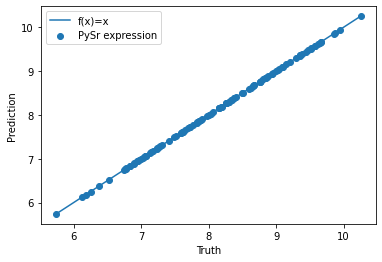

In [221]:
plt.scatter(y, model.predict(X),label='PySr expression')
plt.plot(np.linspace(y.min(),y.max()),np.linspace(y.min(),y.max()),label='f(x)=x')
plt.xlabel('Truth')
plt.ylabel('Prediction')
plt.legend()
plt.show()

In [223]:
df_purge['M_BH']

1      9.38
3      9.10
5      8.34
6      5.74
7      9.00
       ... 
139    7.51
140    7.02
142    7.72
143    7.07
144    7.41
Name: M_BH, Length: 115, dtype: float64

In [224]:
df_purge['M*_sph']+df_purge['log_M_BH/M*_sph']

1      9.38
3      9.10
5      8.34
6      5.74
7      9.00
       ... 
139    7.51
140    7.02
142    7.72
143    7.07
144    7.41
Length: 115, dtype: float64